In [77]:
import numpy as np

from graphtools import *
from vectools import * 

from scipy.linalg import expm
from scipy.sparse.linalg import expm_multiply

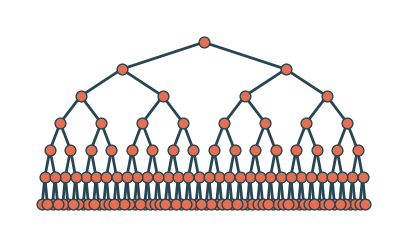

In [107]:
X = [2]*6
AFB = 2*np.pi/X[0]

tree =generate_good_tree(X)
fig, axes = plt.subplots(1, 1, figsize=(5, 5))  # adjust figsize as needed
pl_graph(axes, tree,positions=tree_coords(X,xd=1,yd=1),vertex_size=60,outline_weight = 1, edge_weight=2,margin=.2)
plt.show()

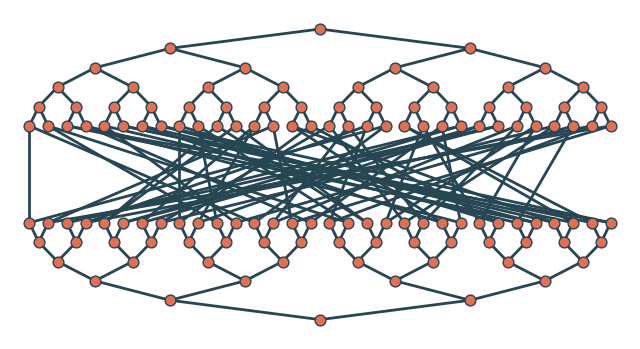

In [79]:
rand = generate_random_cycle_graph(tree)
fig, axes = plt.subplots(1, 1, figsize=(8, 8))  # adjust figsize as needed

pl_graph(axes, rand, positions=rand_cycle_coords(X,xd=3,yd=1,spacing=1), vertex_size=60,outline_weight = 1, edge_weight=2,margin=.2)

plt.show()

In [108]:
ftree = fluxedTree(X)
ftree.construct_fluxed()

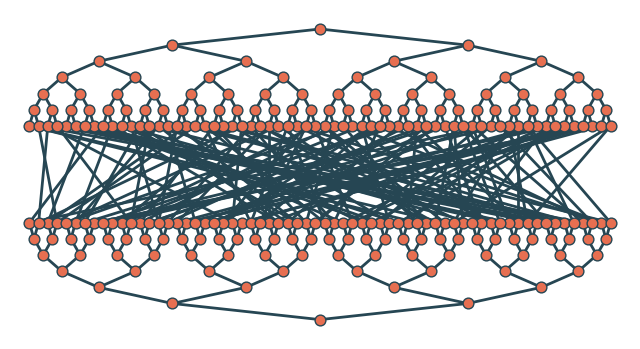

In [109]:
rand = generate_random_cycle_graph(ftree)
fig, axes = plt.subplots(1, 1, figsize=(8, 8))  # adjust figsize as needed

pl_graph(axes, rand, positions=rand_cycle_coords(X,xd=3,yd=1,spacing=1), vertex_size=60,outline_weight = 1, edge_weight=2,margin=.2)

plt.show()

In [110]:
rand.construct_fluxed()
rand.construct_adj()

In [111]:
bare_hamiltonian = rand.adj
fluxed_hamiltonian = rand.weighted_adj(AFB)

In [112]:
def evolve(H, psi0, t):
    U = expm(-1j * H * t)  # time evolution operator U(t)
    psi_t = U @ psi0# time evolution operator U(t)
    return psi_t

In [113]:
N = len(rand.node_map)
psi_i = e_n(0, N)

end = e_n(N-1,N)

In [118]:
N

254

In [119]:
t = np.linspace(0,1000,100)
prob_flux = []
prob_bare = []
for time in t:
    prob_flux.append(abs(end @ evolve(fluxed_hamiltonian, psi_i,time))**2 )
    prob_bare.append(abs(end @ evolve(bare_hamiltonian, psi_i,time))**2 )

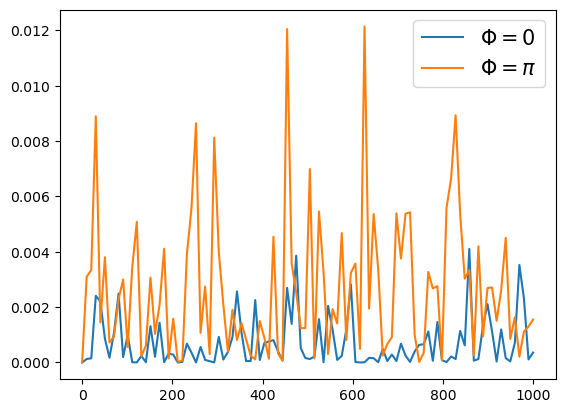

In [120]:
plt.plot(t, prob_bare,label=r"$\Phi = 0$")
plt.plot(t, prob_flux,label=r"$\Phi = \pi$")

plt.legend(fontsize=15)


In [100]:
gt = graph_from_fluxed(cascade(X))
gt.construct_fluxed()
gt.construct_adj()

In [101]:
bare_hamiltonian = gt.adj
fluxed_hamiltonian = gt.weighted_adj(AFB)

In [102]:
N = len(gt.node_map)
psi_i = e_n(0, N)

end = e_n(N-1,N)

In [105]:
t = np.linspace(0,10,100)
prob_flux = []
prob_bare = []
for time in t:
    prob_flux.append(abs(end @ evolve(fluxed_hamiltonian, psi_i,time))**2 )
    prob_bare.append(abs(end @ evolve(bare_hamiltonian, psi_i,time))**2 )

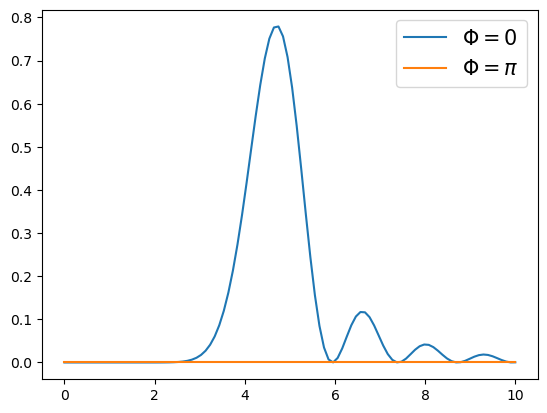

In [106]:
plt.plot(t, prob_bare,label=r"$\Phi = 0$")
plt.plot(t, prob_flux,label=r"$\Phi = \pi$")

plt.legend(fontsize=15)
